# Importing nescessary libraries

In [220]:
import numpy as np 
import pandas as pd
#import plotly.express as px
import pickle

# Reading CSV file

In [221]:
data = pd.read_csv('bbyearend.csv')

## Loading the Model

In [222]:
file = pickle.load(open('model.pk1','rb'))
model = file['model']
scaler = file['scaler']
feature_list = file['features']

## Checking our test data

In [223]:
data.head()

,Unnamed: 0,track_id,track_name,first_artist,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,7K3BhSpAxZBznislvUMVtn,Last Night,Morgan Wallen,0.492,0.675,6,-5.456,1,0.0389,...,0.1420,0.478,203.759,audio_features,7K3BhSpAxZBznislvUMVtn,spotify:track:7K3BhSpAxZBznislvUMVtn,https://api.spotify.com/v1/tracks/7K3BhSpAxZBz...,https://api.spotify.com/v1/audio-analysis/7K3B...,163855,4
1,1,0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,...,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
2,2,3OHfY25tqY28d16oZczHc8,Kill Bill,SZA,0.644,0.728,8,-5.750,1,0.0351,...,0.1610,0.430,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
3,3,0V3wPSX9ygBnCm8psDIegu,Anti-Hero,Taylor Swift,0.637,0.643,4,-6.571,1,0.0519,...,0.1420,0.533,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4
4,4,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,0.715,0.620,1,-6.005,0,0.0484,...,0.0822,0.172,97.950,audio_features,2dHHgzDwk4BJdRwy9uXhTO,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4


In [224]:
# checking if any missing values
print (data.isnull().values.any())

False


## Pre processing function

In [225]:
def preprocess(df):
    features = df[feature_list]
    scaled_df = scaler.transform(features)
    features = pd.DataFrame(scaled_df, columns=features.columns)
    return features

In [226]:
features = preprocess(data)
features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.263201,0.300555,-0.013836,0.496015,0.008041,0.340875,-0.347489,-0.270674,-0.003895,0.137899,0.300707
std,0.963424,0.741093,0.967799,0.625908,1.001337,1.458126,0.781606,0.384855,0.857256,0.922848,0.961168
min,-2.465408,-2.095240,-1.445314,-2.581613,-1.550895,-0.596540,-1.149800,-0.326679,-1.016900,-1.814811,-1.821543
25%,-0.434849,-0.186694,-0.883950,0.246695,-1.550895,-0.505188,-0.985720,-0.326679,-0.563435,-0.538591,-0.426813
50%,0.304152,0.286053,-0.041905,0.630251,0.644789,-0.269038,-0.678662,-0.326676,-0.397497,0.123804,0.283236
75%,0.999084,0.837591,0.800141,0.861960,0.644789,0.244960,0.170326,-0.326622,0.474693,0.809966,0.914102
max,2.327930,1.839363,1.642187,1.566757,0.644789,6.452348,1.875412,3.300136,3.194744,1.940480,3.023751


In [227]:
idx = np.where(model.predict(features)==1)

In [228]:
idx[0]

array([ 1,  2,  4,  5,  9, 10, 11, 13, 14, 16, 17, 18, 19, 23, 24, 25, 26,
       28, 30, 32, 33, 34, 36, 37, 39, 42, 44, 45, 47, 48, 50, 51, 52, 55,
       56, 57, 60, 63, 64, 65, 68, 69, 71, 74, 75, 78, 81, 82, 84, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97], dtype=int64)

In [229]:
energetic_df = data.iloc[idx[0],:]
energetic_df.head()

,Unnamed: 0,track_id,track_name,first_artist,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1,1,0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,...,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
2,2,3OHfY25tqY28d16oZczHc8,Kill Bill,SZA,0.644,0.728,8,-5.750,1,0.0351,...,0.1610,0.430,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
4,4,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,0.715,0.620,1,-6.005,0,0.0484,...,0.0822,0.172,97.950,audio_features,2dHHgzDwk4BJdRwy9uXhTO,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4
5,5,0WtM2NBVQNNJLh6scP13H8,Calm Down (with Selena Gomez),Rema,0.801,0.806,11,-5.206,1,0.0381,...,0.1140,0.802,106.999,audio_features,0WtM2NBVQNNJLh6scP13H8,spotify:track:0WtM2NBVQNNJLh6scP13H8,https://api.spotify.com/v1/tracks/0WtM2NBVQNNJ...,https://api.spotify.com/v1/audio-analysis/0WtM...,239318,4
9,9,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),David Guetta,0.561,0.965,7,-3.673,0,0.0343,...,0.3710,0.304,128.040,audio_features,4uUG5RXrOk84mYEfFvj3cK,spotify:track:4uUG5RXrOk84mYEfFvj3cK,https://api.spotify.com/v1/tracks/4uUG5RXrOk84...,https://api.spotify.com/v1/audio-analysis/4uUG...,175238,4


## Analyzing

In [230]:
# calculating percentage of songs that were energetic
energetic = len(idx[0],)/len(data)*100
print (energetic)

61.0


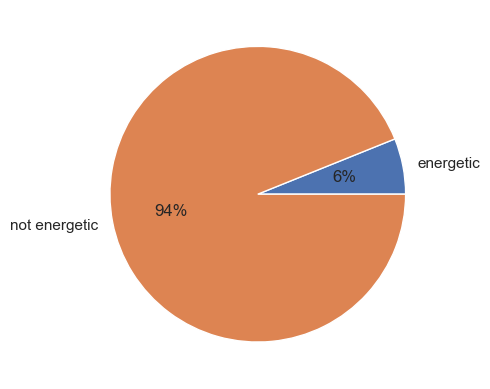

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

#energetic_songs = data.iloc[idx[0],:][feature_list]

#pie chart for proportion of energetic songs
data = [energetic,(1000-energetic)]
labels = ['energetic','not energetic']

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()


(0.0, 300.0)

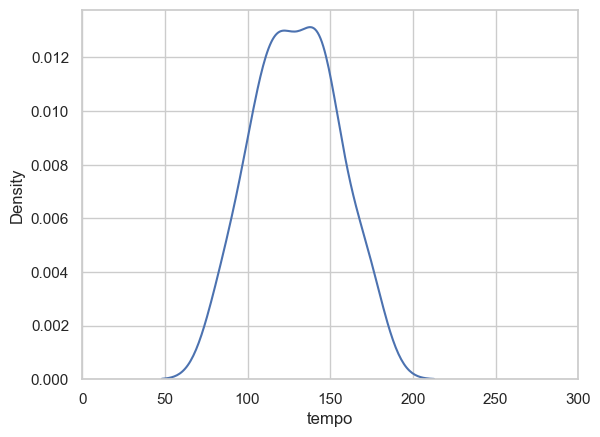

In [279]:
# kde for tempo
sns.kdeplot(data = energetic_df, x='tempo')
plt.xlim(0,300)

<Axes: xlabel='loudness', ylabel='Density'>

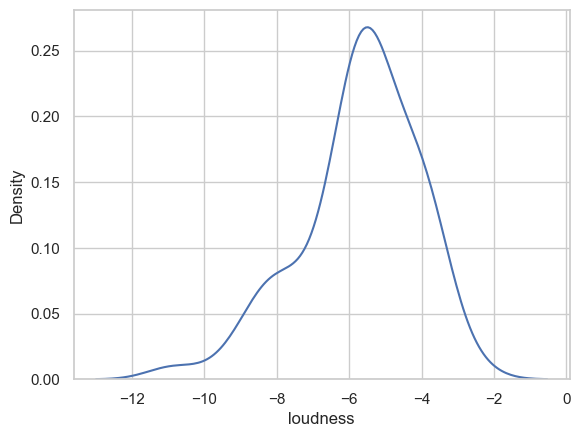

In [236]:
sns.kdeplot(data = energetic_df, x = 'loudness')

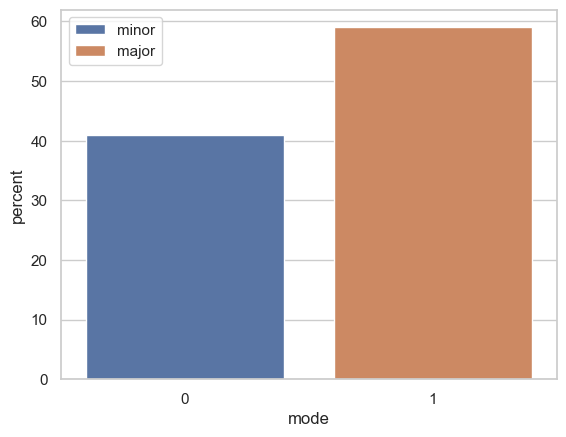

In [261]:
# barplot for mode
sns.countplot(energetic_df, x="mode", stat="percent", hue="mode")
plt.legend(labels = ['minor', 'major'])

<Axes: xlabel='key', ylabel='percent'>

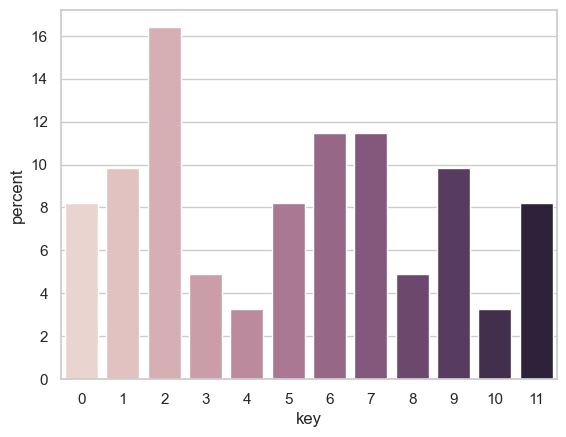

In [262]:
#barchart for key
sns.countplot(energetic_df, x = "key", stat="percent", hue="key", legend=False)

<Axes: xlabel='key', ylabel='percent'>

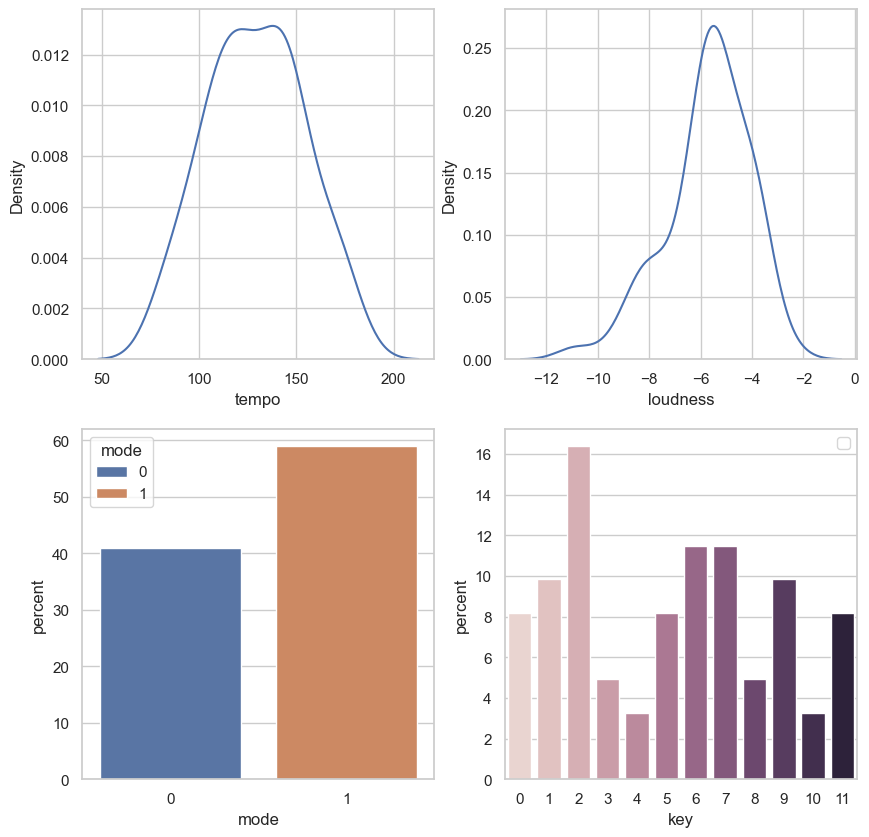

In [269]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.kdeplot(ax=axes[0, 0], data = energetic_df, x='tempo')
sns.kdeplot(ax=axes[0, 1], data = energetic_df, x = 'loudness')
sns.countplot(ax=axes[1,0], data= energetic_df, x="mode", stat="percent", hue="mode")
plt.legend(labels = ['minor', 'major'])
sns.countplot(energetic_df, x = "key", stat="percent", hue="key", legend=False)